In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

osteoporosis_df = pd.read_csv('osteoporosis.csv')

# Note: I am using this to revert the changed I made during the cleaning process to show the original data (missing values)
osteoporosis_df["Alcohol Consumption"] = np.where(osteoporosis_df["Alcohol Consumption"] == "None", np.nan, osteoporosis_df["Alcohol Consumption"])
osteoporosis_df["Medical Conditions"] = np.where(osteoporosis_df["Medical Conditions"] == "None", np.nan, osteoporosis_df["Medical Conditions"])
osteoporosis_df["Medications"] = np.where(osteoporosis_df["Medications"] == "None", np.nan, osteoporosis_df["Medications"])

osteoporosis_df.head()


,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [5]:
# Here we can set row labeled indexes since each column in the data-frame is a Panda Series (1D arrays that can be labeled with row indexes)
# Although ID is a unique column the values are very large and difficult to work with, so we will use the default index 
# osteoporosis_df.set_index("Id", inplace=True)
osteoporosis_df.reset_index(inplace=True)


osteoporosis_df.head()

,index,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [7]:
# Summary Statistics

print(osteoporosis_df.shape)

# Generates descriptive statistics of numeric columns
osteoporosis_df.describe()

# If we wish to see the descriptive statistics corresponding to categorical columns we have to work around it
categorical_columns = osteoporosis_df.dtypes[osteoporosis_df.dtypes == "object"].index # The index extracts the column names
osteoporosis_df[categorical_columns].describe()

(1958, 17)


,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures
count,1958,1958,1958,1958,1958,1958,1958,1958,1958,970,1311,973,1958
unique,2,2,2,3,2,2,2,2,2,1,2,1,2
top,Male,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,Hyperthyroidism,Corticosteroids,Yes
freq,992,981,998,681,1027,1004,1011,1021,982,970,678,973,983


In [9]:
# Preprocessing

osteoporosis_df = osteoporosis_df.rename(columns = 
                                         {"Hormonal Changes": "Hormonal_Changes",
                                          "Family History" : "Family_History",
                                          "Body Weight" : "Body_Weight",
                                          "Calcium Intake" : "Calcium_Intake",
                                          "Vitamin D Intake" : "Vitamin_D_Intake",
                                          "Physical Activity" : "Physical_Activity",
                                          "Alcohol Consumption" : "Alcohol_Consumption",
                                          "Medical Conditions" : "Medical_Conditions",
                                          "Prior Fractures" : "Prior_Fractures"})
osteoporosis_df.columns



Index(['index', 'Id', 'Age', 'Gender', 'Hormonal_Changes', 'Family_History',
       'Race/Ethnicity', 'Body_Weight', 'Calcium_Intake', 'Vitamin_D_Intake',
       'Physical_Activity', 'Smoking', 'Alcohol_Consumption',
       'Medical_Conditions', 'Medications', 'Prior_Fractures', 'Osteoporosis'],
      dtype='object')

In [11]:
# Preprocessing (Cleaning)

# Check the total missing values in each column
osteoporosis_df.isnull().sum()

# Check the percentage of missing values in each column
print(osteoporosis_df.isnull().mean() * 100)

index                   0.000000
Id                      0.000000
Age                     0.000000
Gender                  0.000000
Hormonal_Changes        0.000000
Family_History          0.000000
Race/Ethnicity          0.000000
Body_Weight             0.000000
Calcium_Intake          0.000000
Vitamin_D_Intake        0.000000
Physical_Activity       0.000000
Smoking                 0.000000
Alcohol_Consumption    50.459653
Medical_Conditions     33.043922
Medications            50.306435
Prior_Fractures         0.000000
Osteoporosis            0.000000
dtype: float64


In [13]:
# Our columns with missing values are Alcohol Consumption, Medical Conditions, and Medications
# Since they have a large number of missing values, it's best to not drop them considering our dataset isn't very large (1958 rows)
# Instead we can replace them with None since they are categorical columns and it is a valid value
osteoporosis_df.fillna("None", inplace = True)
print(osteoporosis_df.isnull().sum())

# Drop the ID column since it is not useful for our analysis and machine learning models
osteoporosis_df.drop("Id", axis = 1, inplace = True) # axis = 1 means we are dropping a column



index                  0
Id                     0
Age                    0
Gender                 0
Hormonal_Changes       0
Family_History         0
Race/Ethnicity         0
Body_Weight            0
Calcium_Intake         0
Vitamin_D_Intake       0
Physical_Activity      0
Smoking                0
Alcohol_Consumption    0
Medical_Conditions     0
Medications            0
Prior_Fractures        0
Osteoporosis           0
dtype: int64


# Preprocessing (Transformation)

 - In Transformation we can perform several operations such as Encoding, Feature Scaling, New Feature Creation, etc.

 - Since our columns are pretty distinct there is no need to create or combine any columns

 - **Label Encoding:** converts categorical data to numerical data (integers assigned don't imply any hierarchy order)

   - Example: Red, Green, Blue may be assigned 0, 1, 2 but Green isn't necessarily greater than Red

- **Feature Scaling:** adjusting numerical values so that they fall within a similar range, making it easier for ML model to interpret

  - **Standardization:** transforms data to have a mean of 0 and a standard deviation of 1
    - Best for data following a Gaussian (Normal) Distribution
    - Useful for linear models, SVMs, PCA, k-NN, and neural networks.

  - **Normalization:** scales data to a range of [0, 1]
    - Best for data that's skewed (Not Normal Distribution) 
    - Normalization: Beneficial for neural networks, k-NN, SVMs, and gradient-based models.
  

 - **NOTE:** No scaling needed for tree-based models (Decision Trees, Random Forests, Gradient Boosting) and categorical features.

In [15]:
# Label Encoding

# Scikit-learn provides an efficient tool for label encoding
from sklearn.preprocessing import LabelEncoder 
 
label_encoder = LabelEncoder()

# Since we want to create graphs later on, it'll be hard to visualize categorical data with numbers
# So we will store the encoded values in a separate data-frame
osteoporosis_df_encoded = pd.DataFrame()

for col in osteoporosis_df.columns:
    if osteoporosis_df[col].dtype == "object":
        osteoporosis_df_encoded[col] = label_encoder.fit_transform(osteoporosis_df[col])
        
    else:
        osteoporosis_df_encoded[col] = osteoporosis_df[col]
 
# This will encode a single column       
# data['new_column'] = label_encoder.fit_transform(df[column])

# Since we are using Normalization, we will store the all the encoded variables and scaled Age in a separate data-frame
# That way the tree-based models when creating decisions will not be affected by the scaling of Age
osteoporosis_df_scaled_encoded = osteoporosis_df_encoded.copy()

osteoporosis_df_scaled_encoded.head()

,index,Age,Gender,Hormonal_Changes,Family_History,Race/Ethnicity,Body_Weight,Calcium_Intake,Vitamin_D_Intake,Physical_Activity,Smoking,Alcohol_Consumption,Medical_Conditions,Medications,Prior_Fractures,Osteoporosis
0,0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1


,index,Age,Gender,Hormonal_Changes,Family_History,Race/Ethnicity,Body_Weight,Calcium_Intake,Vitamin_D_Intake,Physical_Activity,Smoking,Alcohol_Consumption,Medical_Conditions,Medications,Prior_Fractures,Osteoporosis
0,0,0.708333,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,1,0.194444,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,2,0.986111,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,3,0.833333,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,4,0.277778,1,1,1,0,0,1,1,0,1,1,2,1,1,1


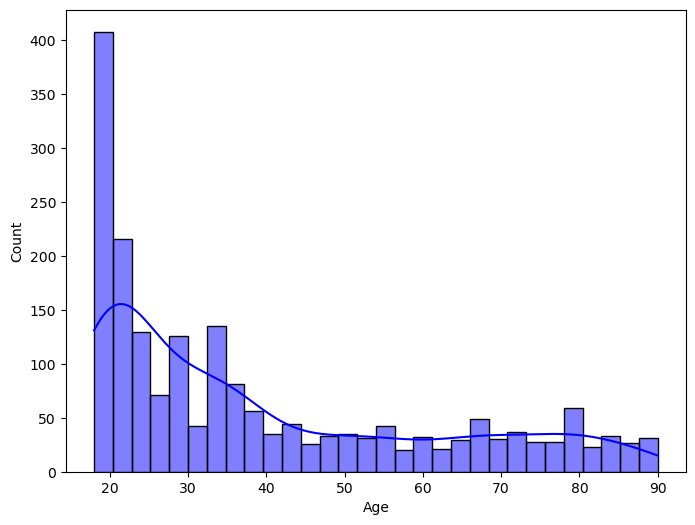

In [17]:
# Feature Scaling

# To decide if we should use Standardization or Normalization lets visualize the data

plt.figure(figsize=(8, 6))
sns.histplot(osteoporosis_df_encoded['Age'], kde=True, bins=30, color='blue') # KDE adds a probability density function to the histogram

# Since Age is right-skewed, we should use Normalization

# Scikit-learn provides an efficient tool for feature scaling as well (MinMaxScaler for Normalization)
from sklearn.preprocessing import MinMaxScaler

osteoporosis_df_scaled_encoded["Age"] = MinMaxScaler().fit_transform(osteoporosis_df_scaled_encoded[["Age"]])

osteoporosis_df_scaled_encoded.head()



<Axes: xlabel='Age', ylabel='Count'>

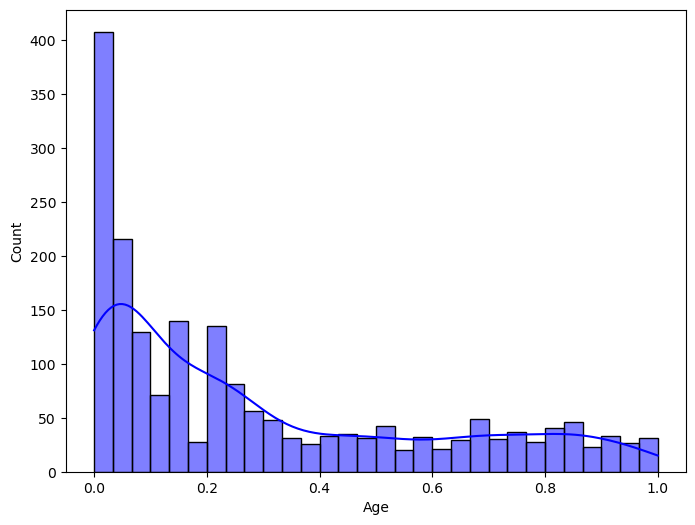

In [19]:
# Notice the x-axis now ranges from 0 to 1
plt.figure(figsize=(8, 6))
sns.histplot(osteoporosis_df_scaled_encoded['Age'], kde=True, bins=30, color='blue')

# Exploratory Data Analysis (EDA)

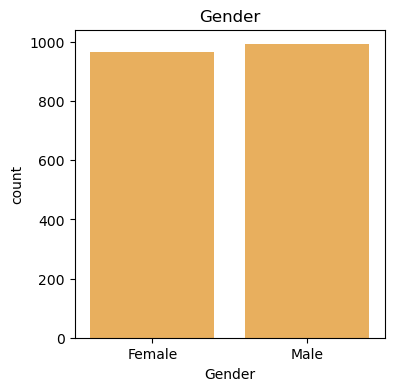

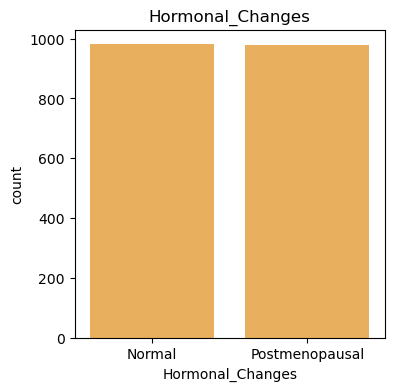

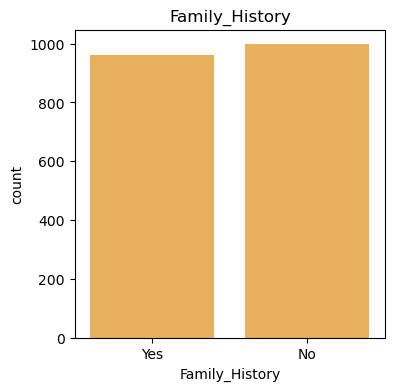

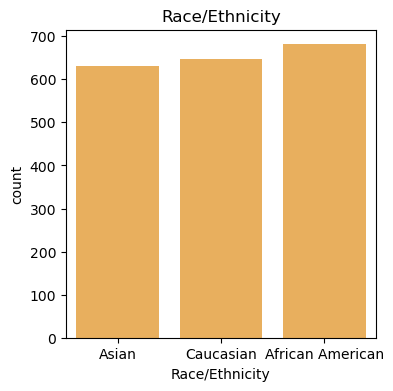

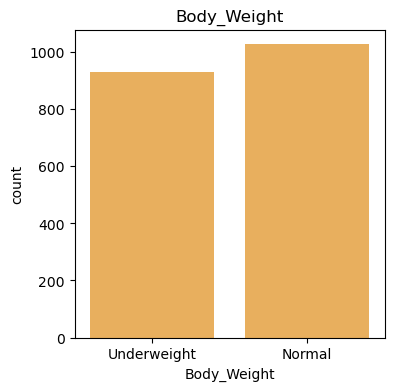

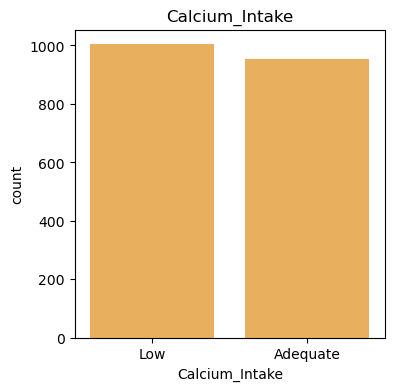

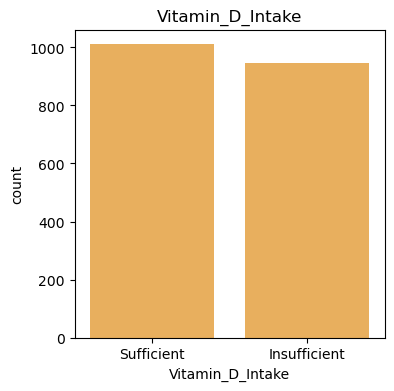

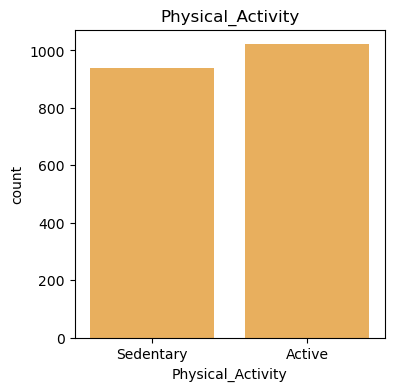

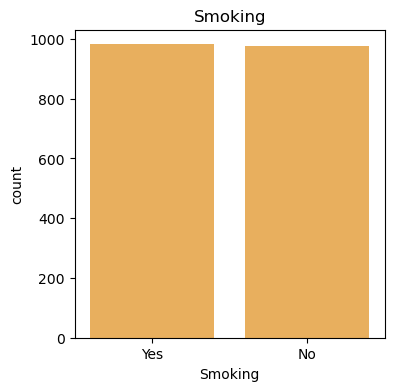

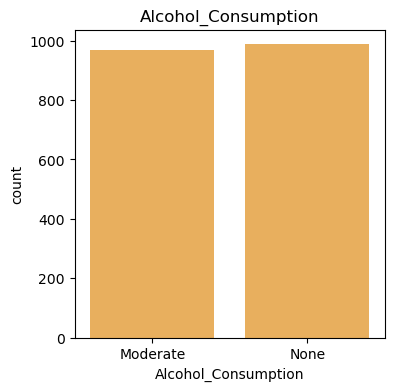

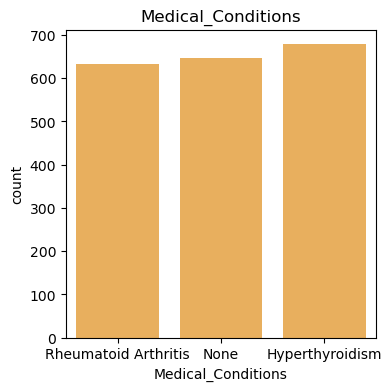

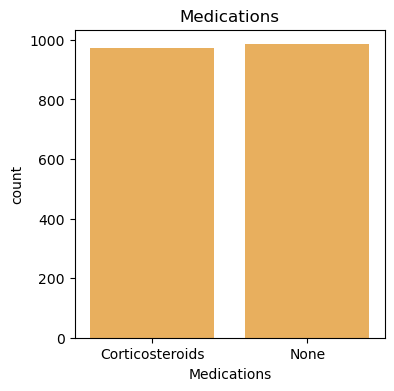

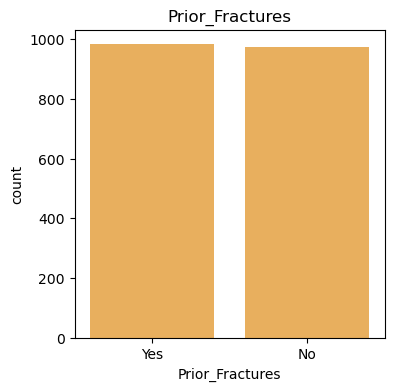

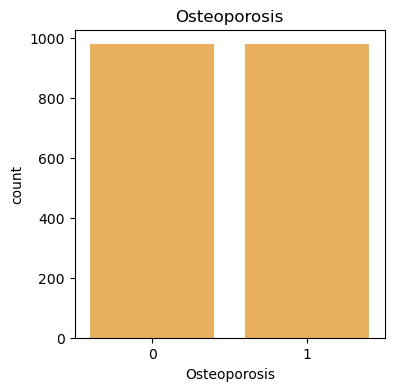

In [21]:
# Analyzing outliers

# Osteoporosis was labeled as a categorical column but with int64, so we will convert it to object for visualization
osteoporosis_df["Osteoporosis"] = osteoporosis_df["Osteoporosis"].astype("object")

# Since we renamed our columns of the original data_frame we have to redo a new list of categorical columns
categorical_columns_renamed = osteoporosis_df.dtypes[osteoporosis_df.dtypes == "object"].index

for col in categorical_columns_renamed:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=osteoporosis_df[col], color= "#FFB347")
    plt.title(col)
    plt.show()

    

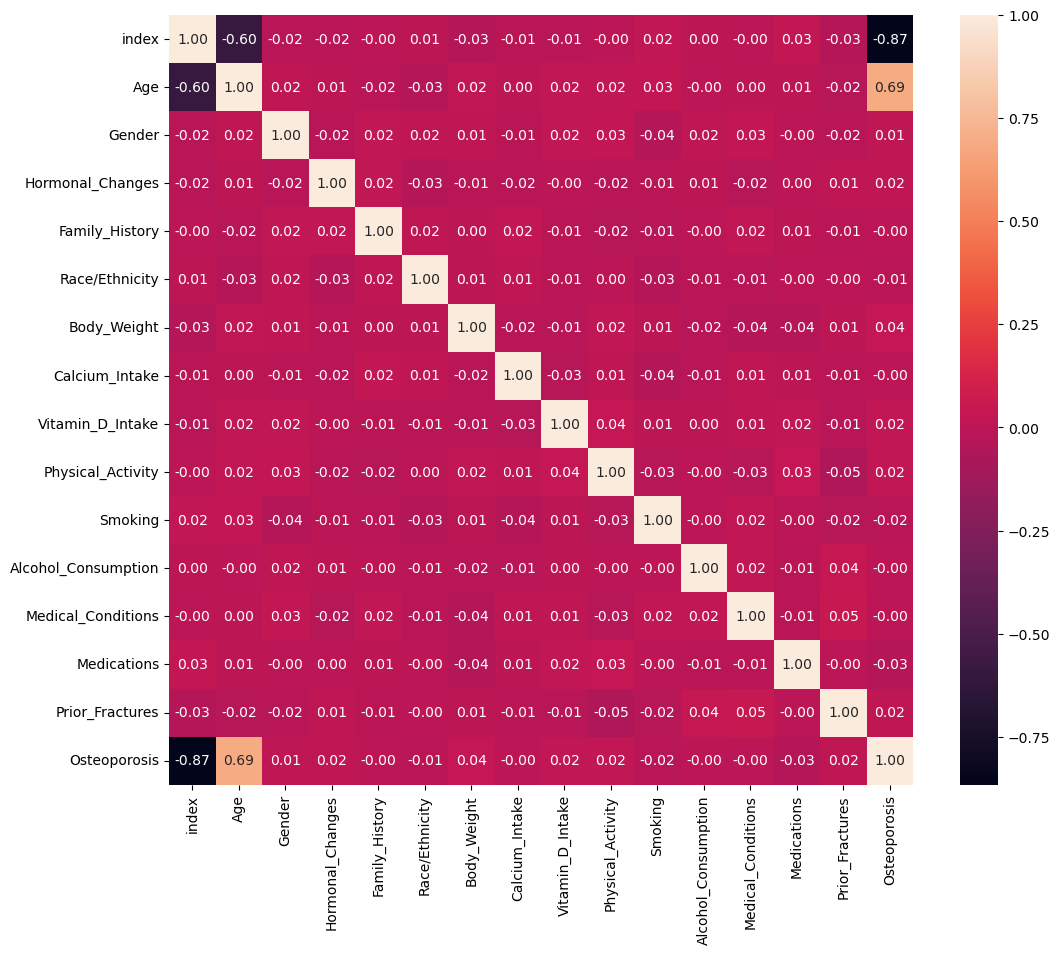

In [23]:
# Exploring Correlation Between Features

corr_matrx = osteoporosis_df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrx, annot=True, fmt = ".2f")
plt.show()

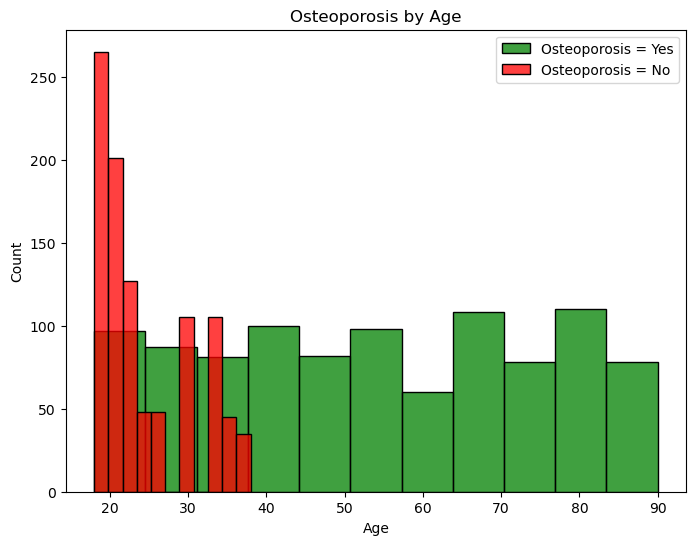

In [25]:
# Analyzing Correlation between Features and Target

# Age and Osteoporosis
plt.figure(figsize=(8, 6))
sns.histplot(data = osteoporosis_df.loc[osteoporosis_df["Osteoporosis"] == 1, "Age"], color='green', label='Osteoporosis = Yes')
sns.histplot(data = osteoporosis_df.loc[osteoporosis_df["Osteoporosis"] == 0, "Age"], color='red', label='Osteoporosis = No')

plt.legend()
plt.xlabel('Age')
plt.title('Osteoporosis by Age')
plt.show()

The histogram of Osteoporosis by Age shows the relation of the age of the patient and the risk of osteoporosis. We see that there's an major risk of osteoporosis for all ages except between 18-30. From this we can say that younger patients are less likely of having osteoporosis. Thus we should use this predictor.

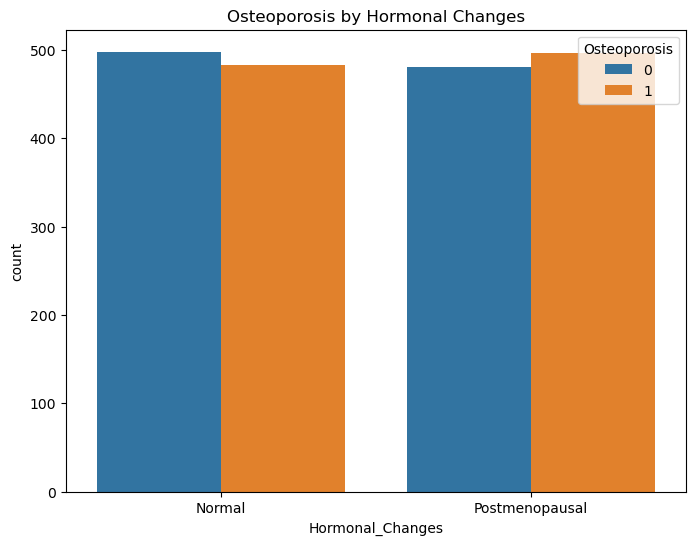

In [27]:
# Hormonal Changes and Osteoporosis
plt.figure(figsize=(8, 6))
sns.countplot(x='Hormonal_Changes',data = osteoporosis_df,hue='Osteoporosis').set_title('Osteoporosis by Hormonal Changes')
plt.show()

From the count-plot above we can see that Hormonal Changes does increase the likelihood of Osteoporosis. After the menopause has occurred symptoms become more open to the possibility of Osteoporosis. Thus we should use this predictor.

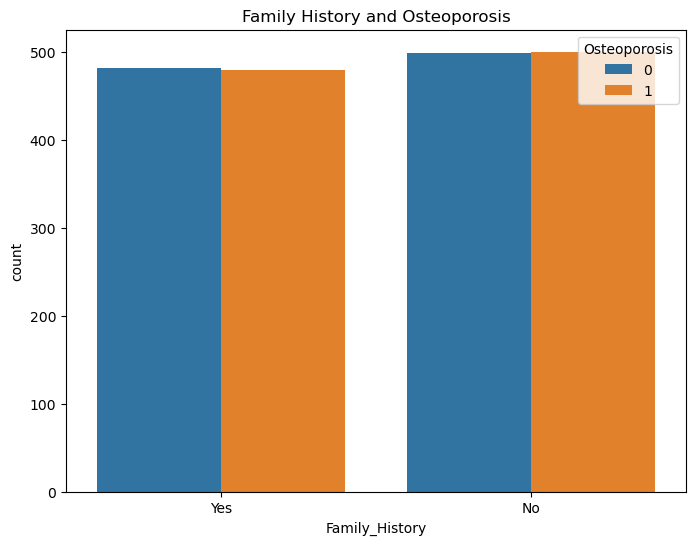

In [29]:
# Family History and Osteoporosis
plt.figure(figsize=(8, 6))
sns.countplot(x = "Family_History", data = osteoporosis_df, hue = "Osteoporosis").set_title("Family History and Osteoporosis")
plt.show()

As we saw before how genetics play a role in Osteoporosis, this graph shows that the role of Family History may not influence Osteoporosis. We see that the chance of Osteoporosis is pretty leveled for both if some in the family had the disease or not. Thus we should not use this predictor.



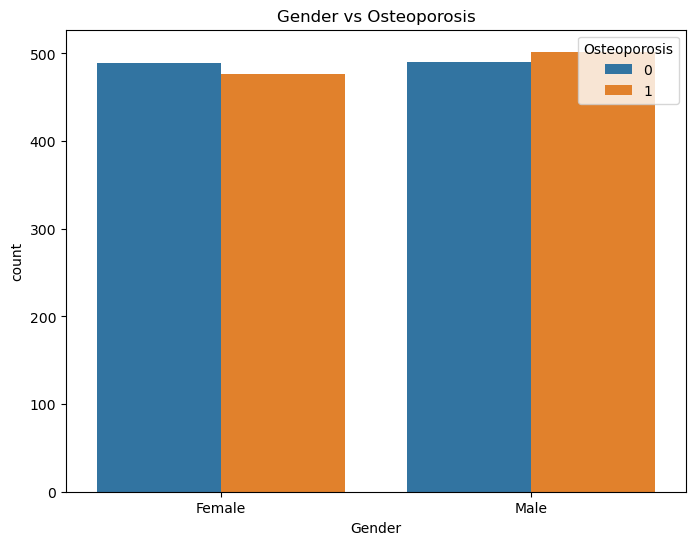

In [31]:
# Gender and Osteoporosis

plt.figure(figsize=(8, 6))
sns.countplot(data = osteoporosis_df, x = "Gender", hue='Osteoporosis').set_title('Gender vs Osteoporosis')
plt.show()

Although from the count-plot between Gender and Osteoporosis indicate that Men face a bigger risk of this disease compared to Women, the difference between the two genders are fairly minimal. Since this difference is not significant, gender could be a weak predictor for the model. Thus we most likely won't include it.

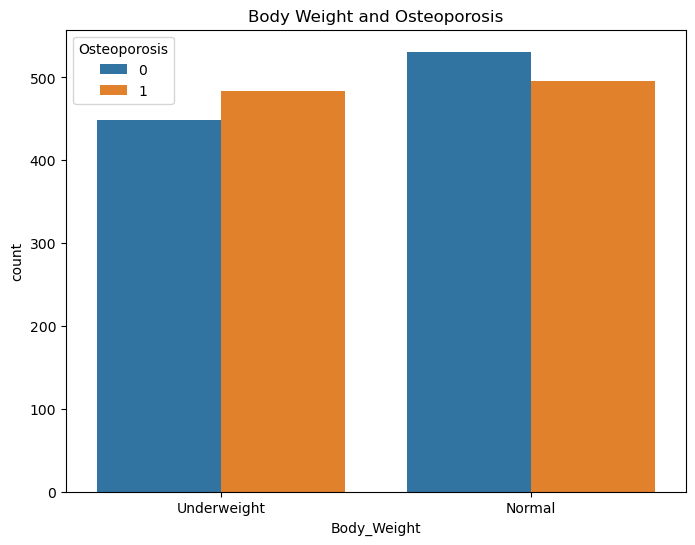

In [33]:
# Body Weight and Osteoporosis

plt.figure(figsize=(8, 6))
sns.countplot(data = osteoporosis_df, x = "Body_Weight", hue = "Osteoporosis").set_title("Body Weight and Osteoporosis")
plt.show()

From the count-plot above which displays Body Weight and Osteoporosis, there's a significant difference between Normal and Underweight. If you're underweight then you face a higher risk of Osteoporosis, which makes sense since our body weight incorporates the strength of our bones. Thus body weight is a predictor that'll be included in the model.

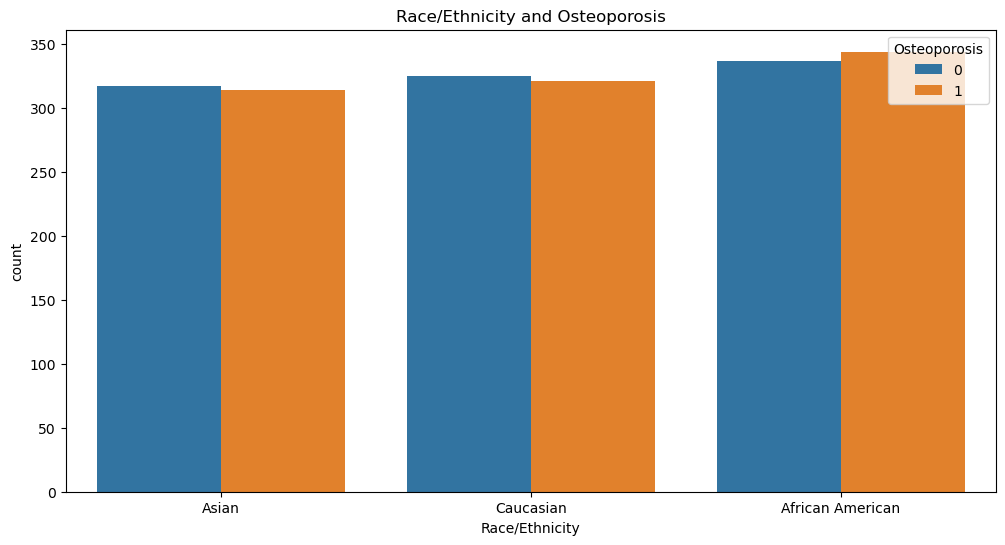

In [35]:
# Race/Ethnicity and Osteoporosis

plt.figure(figsize=(12, 6))
sns.countplot(data = osteoporosis_df, x = "Race/Ethnicity", hue = "Osteoporosis").set_title("Race/Ethnicity and Osteoporosis")
plt.show()

The chart above shows very minimal to almost no significant difference between Race/Ethnicity for risk of Osteoporosis. Thus we should not include this feature into our model.

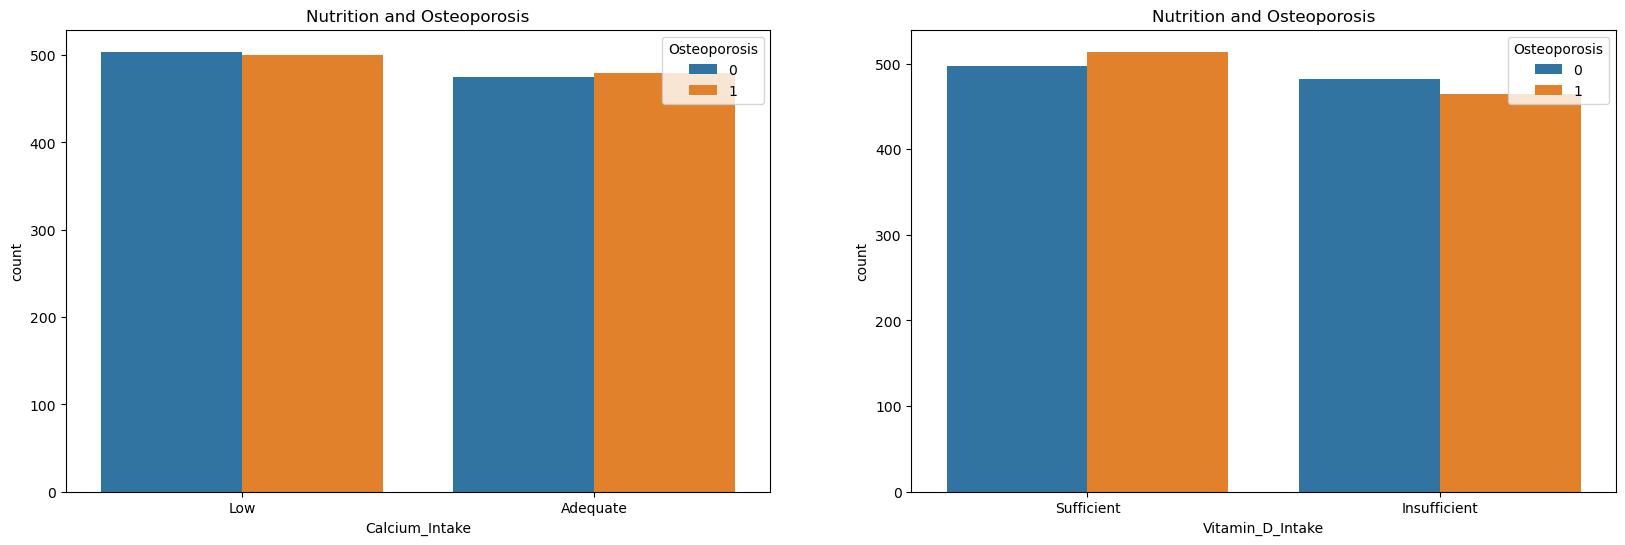

In [37]:
# Nutrition and Osteoporosis

fig, ax = plt.subplots(1, 2, figsize=(20, 6))


sns.countplot(data = osteoporosis_df, x = "Calcium_Intake", ax = ax[0], hue = "Osteoporosis")
ax[0].set_title("Nutrition and Osteoporosis")

sns.countplot(data = osteoporosis_df, x = "Vitamin_D_Intake", ax = ax[1], hue = "Osteoporosis")
ax[1].set_title("Nutrition and Osteoporosis")
plt.show()

From the subplots above demonstrating two different types of Nutrition - Calcium and Vitamin D intake - we see people with lower Calcium and insufficient levels of Vitamin D face a higher risk of Osteoporosis compared to meeting the sufficient levels. This makes sense since nutrition helps with making our bones strong, thus it's a good predictor to include in the model.

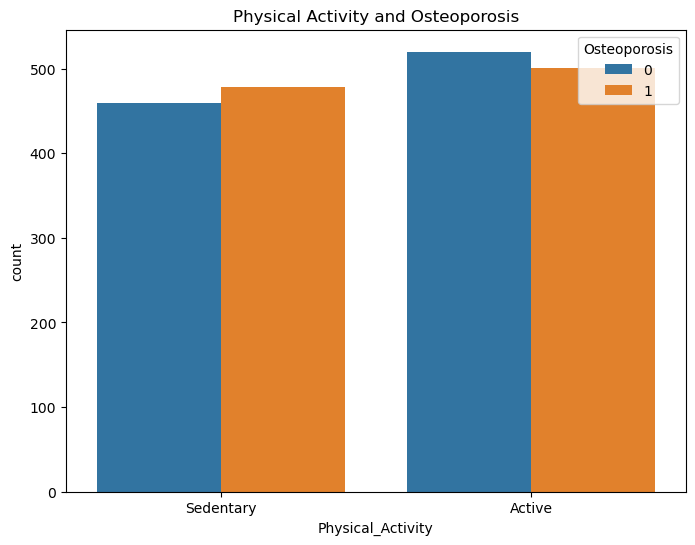

In [39]:
# Physical Activity and Osteoporosis

plt.figure(figsize=(8, 6))
sns.countplot(data = osteoporosis_df, x = 'Physical_Activity', hue = 'Osteoporosis').set_title('Physical Activity and Osteoporosis')
plt.show()

In this visualization above showing Physical Activity and Osteoporosis, we see that there's a relation between them by illustrating that inactivity can lead to higher risk of Osteoporosis. Thus it's a good predictor to include in the model.

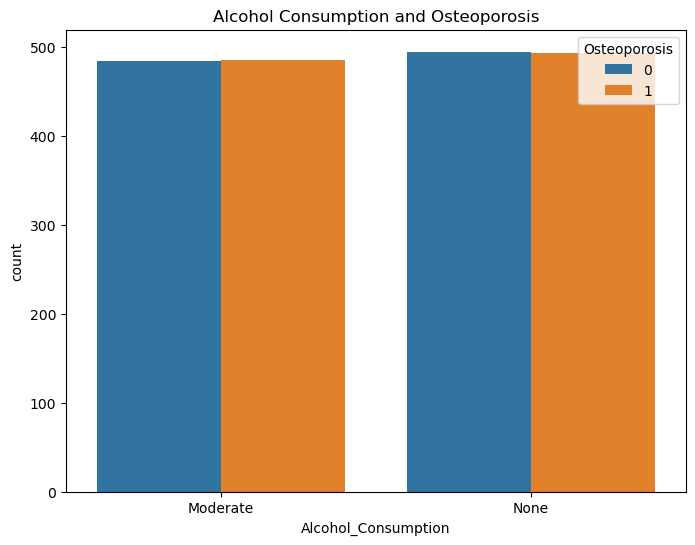

In [41]:
# Alcohol Consumption and Osteoporosis

plt.figure(figsize=(8, 6))
sns.countplot(data = osteoporosis_df, x = 'Alcohol_Consumption', hue = 'Osteoporosis').set_title('Alcohol Consumption and Osteoporosis')
plt.show()


It appears that alcohol consumption seems to not be a important predictor as it doesn't demonstrate a significant correlation with having Osteoporosis vs Not having Osteoporosis.

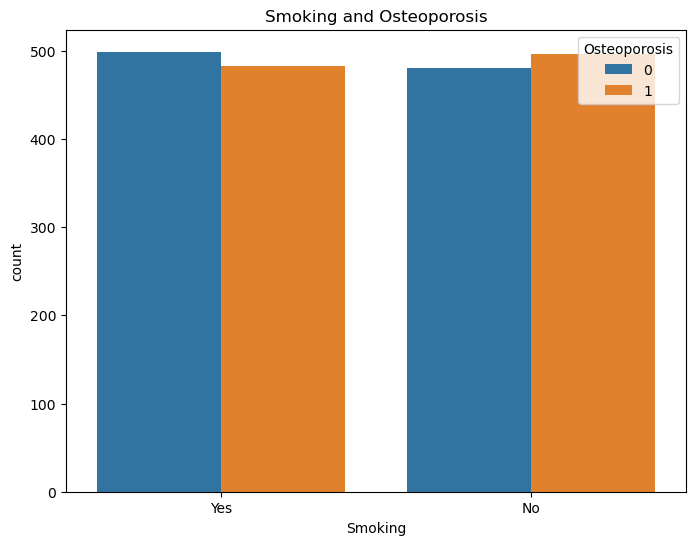

In [43]:
# Smoking and Osteoporosis

plt.figure(figsize=(8, 6))
sns.countplot(osteoporosis_df, x = 'Smoking', hue = 'Osteoporosis').set_title('Smoking and Osteoporosis')
plt.show()


Likewise to the alcohol consumption, smoking appears to not have a drastic effect on the risk of Osteoporosis. So it may not be a significant factors, and thus would be best to avoid including it in the model.

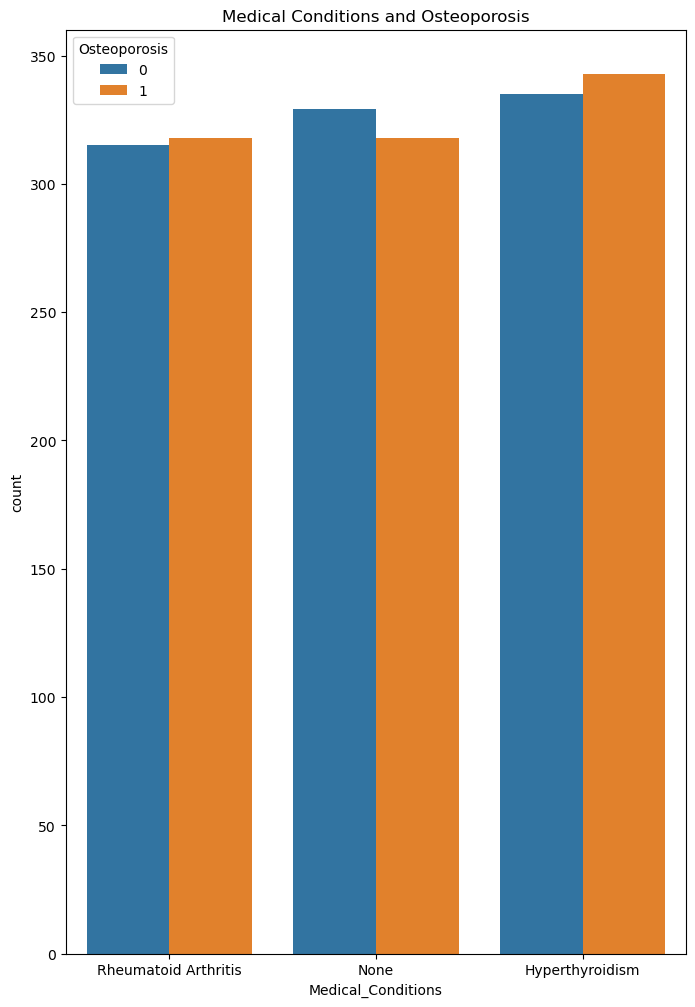

In [45]:
# Medical Conditions and Osteoporosis

plt.figure(figsize=(8, 12))
sns.countplot(data = osteoporosis_df, x = 'Medical_Conditions', hue = 'Osteoporosis').set_title('Medical Conditions and Osteoporosis')
plt.show()

From these Medical Conditions, it seems that Hyperthyroidism has the largest affect on Osteoporosis risk compared to Rheumatoid Arthritis and having no medical conditions. This demonstrates that Hyperthyroidism is a significant so we should include the medical conditions predictor.

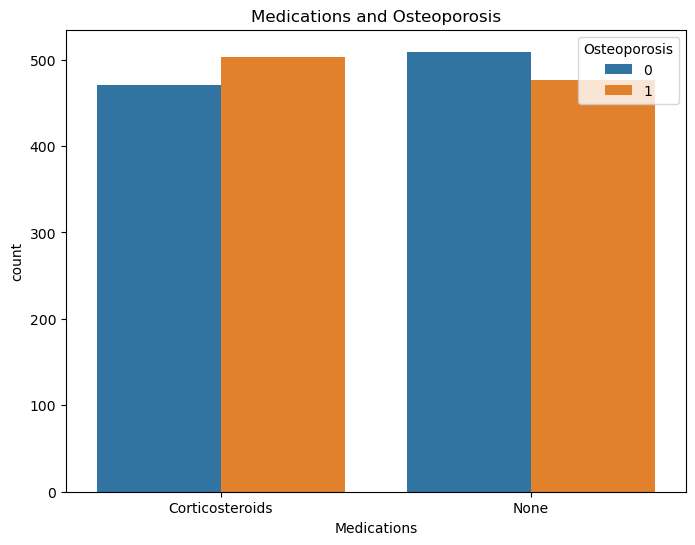

In [47]:
# Medications and Osteoporosis

plt.figure(figsize=(8, 6))
sns.countplot(data = osteoporosis_df, x = 'Medications', hue = 'Osteoporosis').set_title('Medications and Osteoporosis')
plt.show()

In addition to medical conditions, those who consume Corticosteroids under medication are likely to have Osteoporosis, thus this is a great predictor to include in the model.

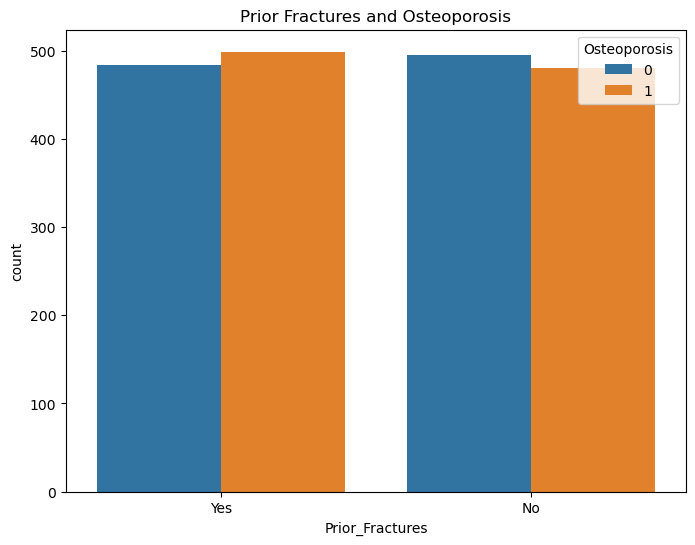

In [49]:
# Prior Fractures and Osteoporosis

plt.figure(figsize=(8, 6))
sns.countplot(data = osteoporosis_df, x = 'Prior_Fractures', hue = 'Osteoporosis').set_title('Prior Fractures and Osteoporosis')
plt.show()

Lastly, for Prior Fractures it appears that there's is much of a significant difference of having one and facing osteoporosis. Though it's similar to a bone-related disease, it may be interesting to include but it doesn't pose as much of a needed predictor.

# Model Building

In [51]:
from sklearn.model_selection import train_test_split

# Splitting for Tree-Based Models (No scaling needed as age is already scaled in `osteoporosis_df_all_encoded`)
x_tree_train, x_tree_test, y_train, y_test = train_test_split(
    osteoporosis_df_encoded[["Age", "Hormonal_Changes", "Body_Weight", "Calcium_Intake", 
                                 "Vitamin_D_Intake", "Physical_Activity", "Medical_Conditions", 
                                 "Medications", "Prior_Fractures"]],
    osteoporosis_df_encoded["Osteoporosis"], test_size=0.3, random_state=13)

# Checking the shapes for Tree-Based Models
print("Tree-Based Model Train and Test Split Shapes:")
print(x_tree_train.shape)
print(x_tree_test.shape)
print(y_train.shape)
print(y_test.shape)


# Splitting for Non-Tree-Based Models (Use `osteoporosis_df_encoded` where age is not scaled)
x_non_tree_train, x_non_tree_test, y_train, y_test = train_test_split(
    osteoporosis_df_scaled_encoded[["Age", "Hormonal_Changes", "Body_Weight", "Calcium_Intake", 
                             "Vitamin_D_Intake", "Physical_Activity", "Medical_Conditions", 
                             "Medications", "Prior_Fractures"]],
    osteoporosis_df_scaled_encoded["Osteoporosis"], test_size=0.3, random_state=13)

# Checking the shapes for Non-Tree-Based Models
print("Non-Tree-Based Model Train and Test Split Shapes:")
print(x_non_tree_train.shape)
print(x_non_tree_test.shape)
print(y_train.shape)
print(y_test.shape)


Tree-Based Model Train and Test Split Shapes:
(1370, 9)
(588, 9)
(1370,)
(588,)
Non-Tree-Based Model Train and Test Split Shapes:
(1370, 9)
(588, 9)
(1370,)
(588,)


# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

lr_model_train = LogisticRegression()

- Parameters: this refers to the values (Beta0, Beta1, Beta2, etc.) that are learned by the model

- Hyperparameters: settings you choose before training the model, which guide how the model will learn the parameters

- However, how do we know which combination of hyperparameters is the best? We can use hyperparameter tuning

- Hyperparameter tuning is the process of finding the best combination of hyperparameters for a given model


In [55]:
from sklearn.model_selection import GridSearchCV

# A dictionary that specifies which hyperparameters to test and the corresponding values.
hyperparameter_dict = {
    'C': [0.1, 1, 10, 100, 1000], # Regularization parameter
    'penalty': ['l1', 'l2'], # Regularization type
    'solver': ['liblinear'], # Linear Classification Algorithm that helps speeds up the process of fitting the model with each combination of hyperparameters (suitable for small datasets)
    'max_iter': [100, 1000, 2500, 5000], # Maximum iterations to run through and find the best parameters that minimize the error
    'multi_class': ['auto', 'ovr'], # Determines how the model should handle multiple classes (ovr )
    'random_state': [0, 42, 101] # Random seed (initializes a new sample so different seeds with same combination will give different results)
}

# The GridSearchCV object will test all possible combinations of hyperparameters to find the best one
grid = GridSearchCV(lr_model_train, # Logistic Regression model
                    hyperparameter_dict, # Dictionary of hyperparameters we defined
                    refit = True, # Once best parameters are found, retrain (full training set) the model with them
                    verbose = 3, # The amount of information we want to display (higher the more detailed)
                    cv = 5, # Number of cross-validation folds
                    n_jobs = -1) # Controls how many cores of the processor are used (-1 means all)
                                 # Ex: If we had 10 combinations of hyperparameters to solve (10-tasks) and 4 cores are used, then 4 tasks will be solved at the same time

grid.fit(x_non_tree_train,y_train) # GridSearchCV will find the best hyperparameters and train the model performing cross-validation
                                 

print(grid.best_params_) # Displays the combination of hyperparameters that resulted in the best performance during the grid search.



Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'C': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


In [57]:
# Using the best hyperparameters to train the model

lr_model_train =  grid.best_estimator_

lr_model_train.fit(x_non_tree_train, y_train)

# Training Accuracy
print(f"Training Accuracy: {lr_model_train.score(x_non_tree_train, y_train) * 100:.2f}%")

log_reg_model_test = lr_model_train.predict(x_non_tree_test)

Training Accuracy: 84.89%


# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt_model_train = DecisionTreeClassifier()

In [61]:
hyperparameter_dict_2 = {'criterion': ['gini', 'entropy'], # specifies the method used to evaluate how well the data is split at each node 
              'max_depth': [10, 20, 30], # Number of levels in the decision tree (shallower trees are less complex)
              'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node
              'min_samples_leaf': [2, 5, 10], # The minimum number of samples required to be at a leaf node (low samples means tree makes decisions based on few cases)
              'random_state': [0, 42, 101]}

#grid search object
grid_2 = GridSearchCV(dt_model_train,
                    hyperparameter_dict_2,
                    refit = True,
                    verbose = 3,
                    cv = 5,
                    n_jobs = -1)

#fitting the data
grid_2.fit(x_tree_train,y_train)

#best parameters
print(grid_2.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, random_state=0, solver=liblinear;, score=0.854 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, random_state=42, solver=liblinear;, score=0.861 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, random_state=101, solver=liblinear;, score=0.847 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l1, random_state=0, solver=liblinear;, score=0.861 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l1, random_state=101, solver=liblinear;, score=0.861 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, random_state=0, solver=liblinear;, score=0.847 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, random_state=42, solver=liblinear;, score=0.869 total time=   0.0s
[CV 1/5] END C=0.1, max_i

In [77]:
dt_model_train = grid_2.best_estimator_

dt_model_train.fit(x_tree_train, y_train)

print(f"Training Accuracy: {dt_model_train.score(x_tree_train, y_train) * 100:.2f}%")

dt_model_test = dt_model_train.predict(x_tree_test)

Training Accuracy: 90.95%


# Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

rfc_mode_train = RandomForestClassifier()

In [81]:
hyperparameter_dict_3 = {'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [2,5,10],
              'random_state': [0,42,101]}

#grid search object
grid_3 = GridSearchCV(rfc_mode_train, 
                      hyperparameter_dict_3,
                      refit = True,
                      verbose = 3,
                      cv = 5,
                      n_jobs = -1)

#fitting the data
grid_3.fit(x_tree_train,y_train)

#best parameters
print(grid_3.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=10, random_state=101;, score=0.901 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=10, random_state=101;, score=0.891 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=10, random_state=101;, score=0.880 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=10, random_state=101;, score=0.894 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=10, random_state=101;, score=0.916 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, random_state=0;, score=0.887 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, random_state=0;, sco

In [83]:
rfc_mode_train = grid_3.best_estimator_

rfc_mode_train.fit(x_tree_train, y_train)   

print(f"Training Accuracy: {rfc_mode_train.score(x_tree_train, y_train) * 100:.2f}%")

rfc_mode_test = rfc_mode_train.predict(x_tree_test)

Training Accuracy: 93.28%


# Support Vector Classifier

In [85]:
from sklearn.svm import SVC

svc_model_train = SVC()

In [87]:
hyperparameter_dict_4 = {'C': [0.1, 1, 10, 100], # Regularization parameter, how it treats errors across the dataset (controls the trade-off between a smooth decision boundary and classifying the training points correctly)
              'degree': [2, 3, 4, 5], # Degree of the polynomial kernel function (creates non-linear decision boundaries)
              'gamma': ['scale', 'auto'], # Gamma refers to how much each individual training data point affects the decision boundary next to it
              'random_state': [0,42,101]}

grid_4 = GridSearchCV(svc_model_train,
                      hyperparameter_dict_4, 
                      refit = True,
                      verbose = 3,
                      cv = 5,
                      n_jobs = -1)

grid_4.fit(x_non_tree_train,y_train)

print(grid_4.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=2, random_state=42;, score=0.872 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=2, random_state=101;, score=0.865 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=5, random_state=101;, score=0.865 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=5, random_state=101;, score=0.843 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=10, random_state=42;, score=0.872 total time=   0.1s
[CV 3/5] END C=0.1, degree=2, gamma=scale, random_state=0;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, random_state=101;, score=0.803 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=auto, random_state=0;, score=

In [89]:
svc_model_train =  grid_4.best_estimator_

svc_model_train.fit(x_non_tree_train, y_train)

print(f"Training Accuracy: {svc_model_train.score(x_non_tree_train, y_train) * 100:.2f}%")

svc_model_test = svc_model_train.predict(x_non_tree_test)

Training Accuracy: 86.06%


# Model Evaluation

## Model Accuracy

Text(0.5, 1.0, 'Model Accuracy')

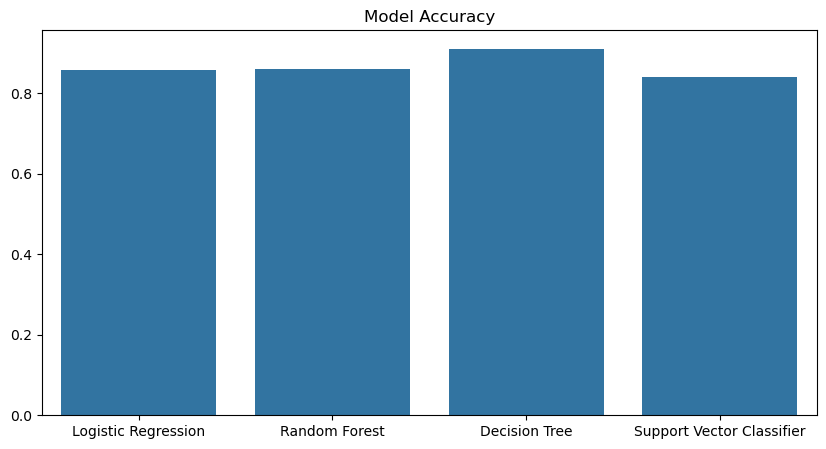

In [91]:
from sklearn.metrics import accuracy_score
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Classifier']
accuracy = [accuracy_score(y_test, log_reg_model_test), accuracy_score(y_test, rfc_mode_test), accuracy_score(y_test, dt_model_test), accuracy_score(y_test, svc_model_test)]
plt.figure(figsize = (10,5))
sns.barplot(x = models, y = accuracy).set_title('Model Accuracy')

## Model Metrics

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy represents the percentage of correct predictions
accuracy = [accuracy_score(y_test, log_reg_model_test),
            accuracy_score(y_test, rfc_mode_test),
            accuracy_score(y_test, dt_model_test),
            accuracy_score(y_test, svc_model_test)]

# Precision: how many of the predicted positive cases are actually positive (minimizing Type I error - false positive)
# How many of the patients we predicted to have osteoporosis actually have it
precisions = [precision_score(y_test, log_reg_model_test, average = 'binary'), # Average parameter indicates how many classes in the response variable
              precision_score(y_test, rfc_mode_test, average = 'binary'),
              precision_score(y_test, dt_model_test, average = 'binary'),
              precision_score(y_test, svc_model_test, average = 'binary')]

# Recall: how many of the actual positive cases we predicted as positive (minimum Type II error - false negative)
# How many of the patients that have osteoporosis were correctly predicted
recalls = [recall_score(y_test, log_reg_model_test, average = 'binary'),
           recall_score(y_test, rfc_mode_test, average = 'binary'),
           recall_score(y_test, dt_model_test, average = 'binary'),
           recall_score(y_test, svc_model_test, average = 'binary')]

# F1-Score: the balance between Precision and Recall
# If high number, it means model is good at predicting high risk individuals (good recall) and don't incorrectly label low risk individuals as high risk (good precision)
f1_scores = [f1_score(y_test, log_reg_model_test, average = 'binary'),
             f1_score(y_test, rfc_mode_test, average = 'binary'),
             f1_score(y_test, dt_model_test, average = 'binary'),
             f1_score(y_test, svc_model_test, average = 'binary')]


results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Classifier'],
    'Accuracy': accuracy,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})


print(results_df.round(2))



                       Model  Accuracy  Precision  Recall  F1-Score
0        Logistic Regression      0.86       0.95    0.76      0.85
1              Random Forest      0.86       0.95    0.77      0.85
2              Decision Tree      0.91       0.99    0.83      0.91
3  Support Vector Classifier      0.84       0.95    0.72      0.82


## Confusion Matrix:

A confusion matrix is a table used to evaluate the performance of a classification model. It compares the actual true classes (the ground truth) with the predicted classes produced by the model.

- Values:
  - True Positive (TP): The number of instances correctly predicted as the positive class.

  - True Negatives (TN): The number of instances correctly predicted as the negative class.

  - False Positives (FP): The number of instances incorrectly predicted as the positive class (Type I error).

  - False Negatives (FN): The number of instances incorrectly predicted as the negative class (Type II error).

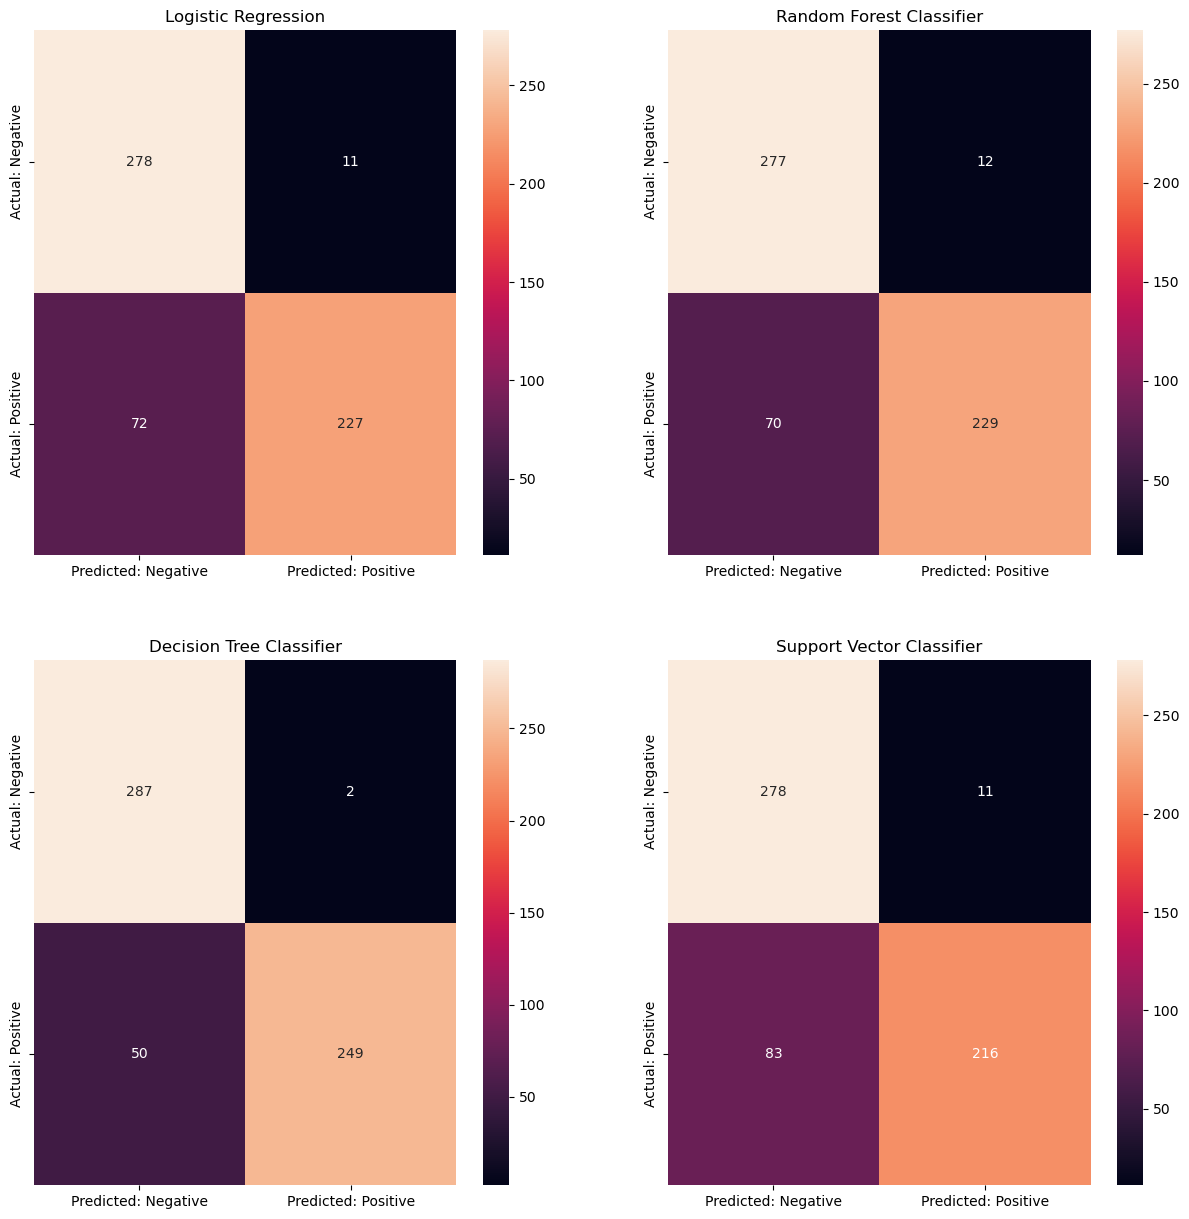

In [95]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

c_matrix_log_reg = confusion_matrix(y_test, log_reg_model_test)
sns.heatmap(c_matrix_log_reg, annot = True, ax = ax[0, 0], fmt = 'g', 
            xticklabels = ['Predicted: Negative', 'Predicted: Positive'], 
            yticklabels = ['Actual: Negative', 'Actual: Positive']).set_title('Logistic Regression')

c_matrix_rf = confusion_matrix(y_test, rfc_mode_test)
sns.heatmap(c_matrix_rf, annot = True, ax = ax[0, 1], fmt = 'g', 
            xticklabels = ['Predicted: Negative', 'Predicted: Positive'], 
            yticklabels = ['Actual: Negative', 'Actual: Positive']).set_title('Random Forest Classifier')

c_matrix_dt = confusion_matrix(y_test, dt_model_test)
sns.heatmap(c_matrix_dt, annot = True, ax = ax[1, 0], fmt = 'g', 
            xticklabels = ['Predicted: Negative', 'Predicted: Positive'], 
            yticklabels = ['Actual: Negative', 'Actual: Positive']).set_title('Decision Tree Classifier')

c_matrix_svc = confusion_matrix(y_test, svc_model_test)
sns.heatmap(c_matrix_svc, annot = True, ax = ax[1, 1], fmt = 'g', 
            xticklabels = ['Predicted: Negative', 'Predicted: Positive'], 
            yticklabels = ['Actual: Negative', 'Actual: Positive']).set_title('Support Vector Classifier')


plt.show()


## Confusion Matrix Analysis:

Logistic Regression:
- **True Positive (TP)**: 227
- **True Negative (TN)**: 278
- **False Positive (FP)**: 11 (Type I Error)
- **False Negative (FN)**: 72 (Type II Error)

Random Forest Classifier:
- **True Positive (TP)**: 227
- **True Negative (TN)**: 277
- **False Positive (FP)**: 12 (Type I Error)
- **False Negative (FN)**: 72 (Type II Error)

Decision Tree Classifier:
- **True Positive (TP)**: 249
- **True Negative (TN)**: 287
- **False Positive (FP)**: 2 (Type I Error)
- **False Negative (FN)**: 50 (Type II Error)

Support Vector Classifier:
- **True Positive (TP)**: 216
- **True Negative (TN)**: 278
- **False Positive (FP)**: 11 (Type I Error)
- **False Negative (FN)**: 83 (Type II Error)


# Saving Model for Front-End

In [97]:
# Pickle is a Python module used for serializing (pickling) and deserializing (unpickling) Python objects.

# Serialization is the process of converting an object into a stream of bytes to store the object a file.

# Deserialization is the process of converting a stream of bytes back into a Python object.

# Byte streams are a way of encoding and transferring information in a binary format rather than a text format. 

# Pickling a trained model allows us to save the model to a file and load it later to make predictions without having to retrain it.

import pickle

# Serializing the decision tree model
with open('decision_tree_model.pkl', 'wb') as file: # WB stands for write binary (opening a file to write its content in binary format)
    pickle.dump(dt_model_train, file)
    


# Serializing the random forest model
with open('random_forest_model.pkl', 'wb') as file: # WB stands for write binary (opening a file to write its content in binary format)
    pickle.dump(rfc_mode_train, file)
    

# Serializing the logistic regression model
with open('logistic_regression_model.pkl', 'wb') as file: # WB stands for write binary (opening a file to write its content in binary format)
    pickle.dump(lr_model_train, file)

# Serializing the support vector classifier model
with open('svc_model.pkl', 'wb') as file: # WB stands for write binary (opening a file to write its content in binary format)
    pickle.dump(svc_model_train, file)



# If want to convert current file from notebook to python file:
# Type the following in terminal: jupyter nbconvert --to script Osteoporosis_Risk_Predictor.ipynb


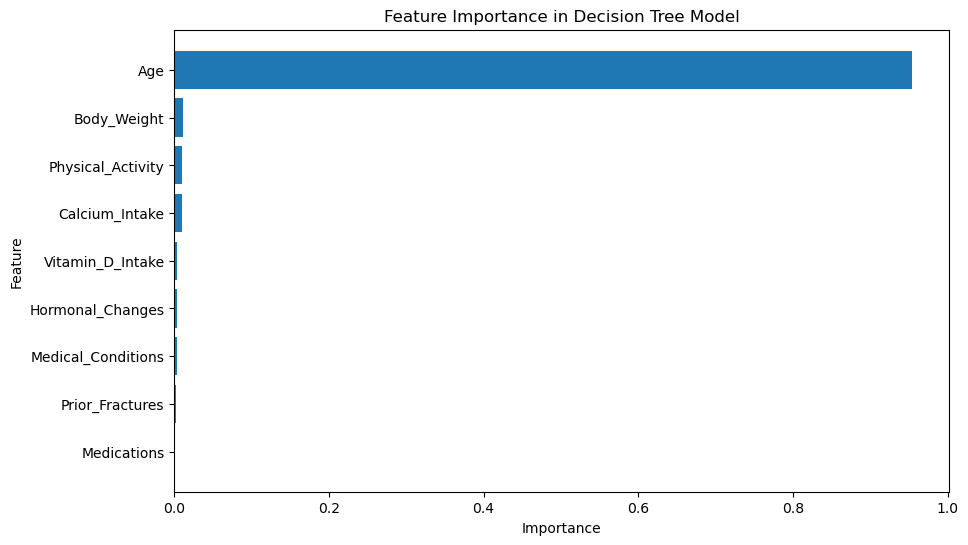

In [99]:
# Since we are using a Decision Tree model, we can visualize the feature importances


# List of features used in the model
features = ["Age", "Hormonal_Changes", "Body_Weight", "Calcium_Intake", "Vitamin_D_Intake", 
            "Physical_Activity", "Medical_Conditions", "Medications", "Prior_Fractures"]

# Extract the important features from the model
importance = dt_model_train.feature_importances_

# Create a DataFrame to visualize the important features
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = True)

# Plotting important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.show()


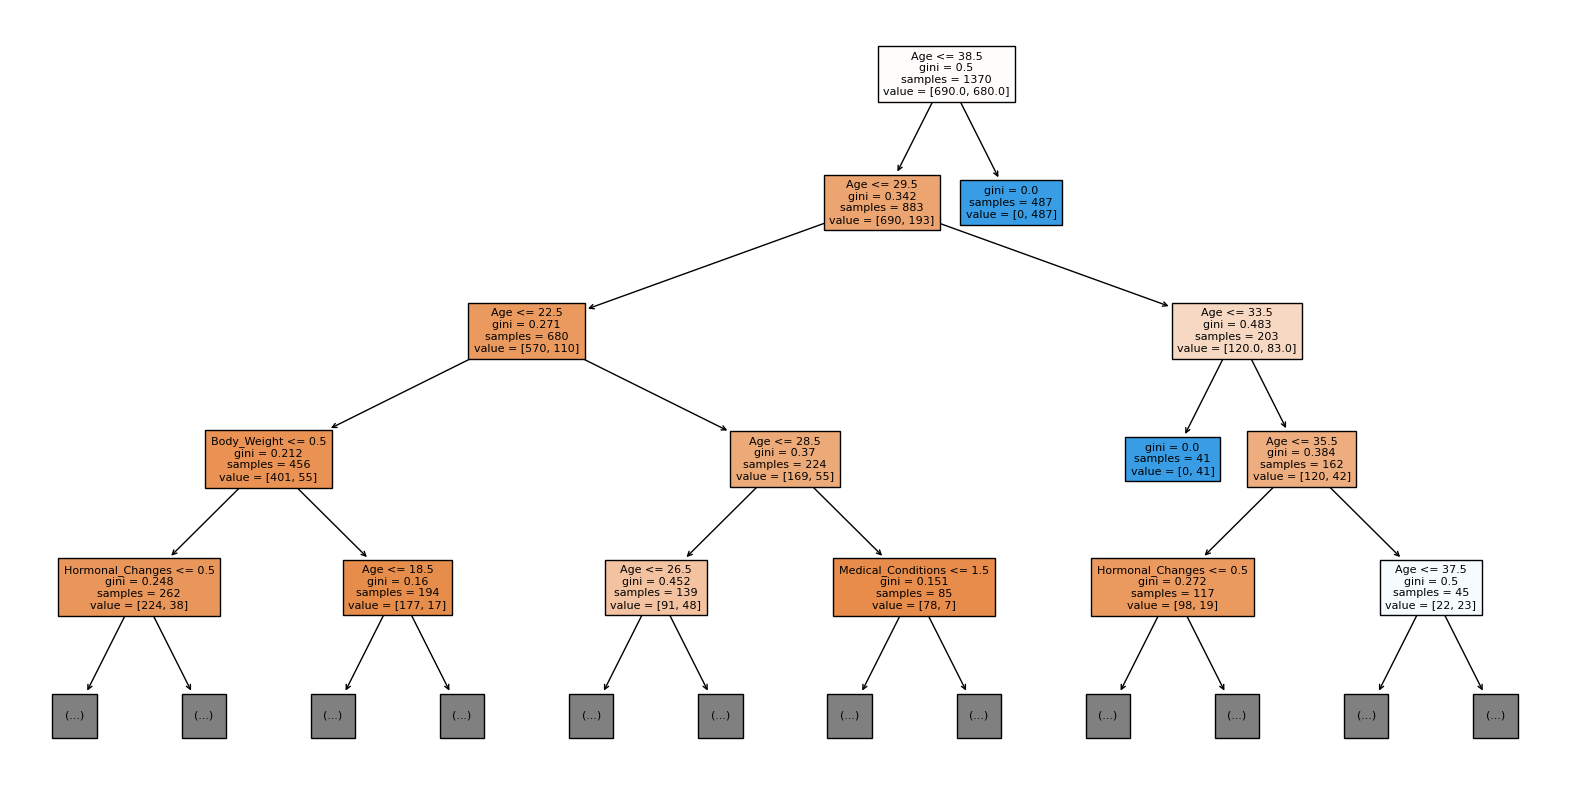

In [101]:
# We can also visualize the decision tree model itself and see how it makes decisions

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model_train, feature_names = features, max_depth = 4, filled = True, fontsize = 8)
plt.show()


In [103]:
# Similarly visualization from above except in text format

from sklearn.tree import export_text
print(export_text(dt_model_train, feature_names = features))


|--- Age <= 38.50
|   |--- Age <= 29.50
|   |   |--- Age <= 22.50
|   |   |   |--- Body_Weight <= 0.50
|   |   |   |   |--- Hormonal_Changes <= 0.50
|   |   |   |   |   |--- Vitamin_D_Intake <= 0.50
|   |   |   |   |   |   |--- Age <= 20.50
|   |   |   |   |   |   |   |--- Calcium_Intake <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Calcium_Intake >  0.50
|   |   |   |   |   |   |   |   |--- Physical_Activity <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Physical_Activity >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  20.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Vitamin_D_Intake >  0.50
|   |   |   |   |   |   |--- Physical_Activity <= 0.50
|   |   |   |   |   |   |   |--- Prior_Fractures <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Prior_Fractures >  0.50
|   |   |   |   |   |   | 